This project focuses on analyzing the Udemy Data Analytics dataset, originally published on Medium. While a member of the Udemy data team previously worked on the project using Excel and visualized the data with Power BI, you intend to utilize Python and Power BI for your analysis.

The project's scope is limited to four course categories: Business Finance, Graphics Design, Musical Instruments, and Web Development.

The objectives of this project are to explore various aspects of the dataset, including the number of courses available in each subject area, the number of subscribers, course ratings, and revenue generation. Additionally, you aim to identify key words associated with the highest-rated and most sought-after courses within each subject category.

To achieve these goals, you will seek answers to questions such as:

Which subject area has the highest and lowest number of published courses?
Which subject area has the highest number of subscribers?
What levels of courses are offered for free?
What common words appear among courses with high ratings and a large number of subscriptions?
How well were the courses rated by subscribers?
For each subject category, in which year were the most courses published?
Which subject area contributes the most to the company's revenue?
By answering these questions and conducting further analysis, you will gain insights into the Udemy dataset's various dimensions, helping to inform decision-making and strategy within the company.

Import Packages and Load Data

In [405]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import string,re,nltk
from datetime import datetime


Business, Music, Design, Web Development Data
Using the read_csv built-in function, load the datasets onto jupyter notebook.

In [406]:
# load the four different datasets
dif_business = pd.read_csv("C:/Users/zendservices/Desktop/Business Courses.csv")
dif_design = pd.read_csv("C:/Users/zendservices/Desktop/Design Courses.csv")
dif_music = pd.read_csv("C:/Users/zendservices/Desktop/Music Courses.csv")
dif_website = pd.read_csv("C:/Users/zendservices/Desktop/Web development Courses.csv")

#join all the datasets
df = pd.concat([dif_business,dif_design,dif_music,dif_website])

#sample
df.head(3)

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance
2,133536.0,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance


In [407]:
#Summary Statsitics
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration
count,3.676000e+03,3676.000000,3676.000000,3676.000000,3676.000000,3677.000000,3676.000000
mean,6.757535e+05,66.115343,3199.260881,156.309848,40.129761,0.610889,4.096137
std,3.431304e+05,61.056073,9486.582966,935.674518,50.398507,0.334244,6.054948
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.074740e+05,20.000000,112.000000,4.000000,15.000000,0.280000,1.000000
50%,6.876920e+05,45.000000,912.500000,18.000000,25.000000,0.760000,2.000000
75%,9.608140e+05,95.000000,2558.000000,67.000000,46.000000,0.930000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,1.000000,78.500000


Data Wrangling

In [408]:
#Check data type and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3681 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3677 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 373.9+ KB


In [409]:
# Check duplicates and drop duplicates
df[df.duplicated()]
# Drop duplicates
df.drop_duplicates( inplace = True)

In [410]:
#drop missing values
df.dropna(inplace= True)
#Confirm check is it no more null values
df.isnull().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

To streamline our analysis, we will drop the following columns from the dataset as they are not relevant to our analysis. Additionally, we will modify the column data types to ensure they are suitable for our analysis.

Drop columns:

[List of columns to be dropped]
Modify column data types:

[List of columns and their updated data types]
By removing unnecessary columns and adjusting the data types, we can focus on the essential information required for our analysis and ensure that the data is represented accurately and appropriately.

In [411]:
# Drop unwanted column from the data set
new_df = df.drop(['url','num_reviews','course_id','num_lectures','content_duration'],axis=1)


In [412]:
#cast datatype as int
new_df['num_subscribers'] = new_df['num_subscribers'].astype('int64')
new_df.head(5)


,course_title,price,num_subscribers,level,Rating,published_timestamp,subject
0,Bitcoin or How I Learned to Stop Worrying and ...,0.0,65576,All Levels,0.56,2013-04-20T02:25:22Z,Business Finance
1,Accounting in 60 Minutes - A Brief Introduction,0.0,56659,Beginner Level,0.95,2013-04-07T21:39:25Z,Business Finance
2,Stock Market Investing for Beginners,0.0,50855,All Levels,0.91,2013-12-25T19:53:34Z,Business Finance
3,Introduction to Financial Modeling,0.0,29167,All Levels,0.18,2014-05-27T16:22:16Z,Business Finance
4,The Complete Financial Analyst Course 2017,195.0,24481,All Levels,0.37,2016-01-21T01:38:48Z,Business Finance


In [413]:
# Make two categoried in data set free or paid
category=[
    (new_df['price']==0),
    (new_df['price']> 0)
]
values= ['free','Paid']
new_df['group']= np.select(category, values)
new_df['group'].value_counts()

group
Paid    3365
free     311
Name: count, dtype: int64

In [414]:
# Create a category for rating 
conditions=[
    (new_df['Rating']==0),
    (new_df['Rating']> 0) & (new_df['Rating']<0.2),
    (new_df['Rating']>= 0.2) & (new_df['Rating']<0.4),
    (new_df['Rating']>= 0.4) & (new_df['Rating']<0.6),
    (new_df['Rating']>=0.6) & (new_df['Rating']<0.8),
    (new_df['Rating']>= 0.8)
]
values1=[0,1,2,3,4,5]
new_df['Star_rating']=np.select(conditions,values1)
new_df['Star_rating'].value_counts()

Star_rating
5    1547
1     735
4     610
2     428
3     338
0      18
Name: count, dtype: int64

In [415]:
#Rename levels
levels = ({'All Levels':'General','Beginner Level':'Beginner','Intermediate Level':'Intermediate','Expert Level':'Expert'})
new_df['level']=new_df['level'].replace(levels)
new_df['level'].value_counts()

level
General         1925
Beginner        1271
Intermediate     422
Expert            58
Name: count, dtype: int64

In [416]:
#extract date from published_timestamp
new_df['published'] = new_df['published_timestamp'].str.split('T').str[0]
new_df = new_df.drop(['published_timestamp'],axis=1)
print(new_df['published'])

0       2013-04-20
1       2013-04-07
2       2013-12-25
3       2014-05-27
4       2016-01-21
           ...    
1200    2017-05-29
1201    2017-07-06
1202    2017-06-11
1203    2017-06-15
1204    2017-06-28
Name: published, Length: 3676, dtype: object


In [417]:
#create a column of year the course was published
new_df['year']=(new_df['published'].str.split('-').str[0]).astype(int)
new_df['year'].value_counts()

year
2016    1205
2015    1014
2017     714
2014     492
2013     201
2012      45
2011       5
Name: count, dtype: int64

In [418]:
#create function to clean text in course _title column in python
def clean_text(text):
    
    text = text.lower()
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text
new_df['course_title']= new_df['course_title'].apply(clean_text)

In [419]:
new_df['subject']= new_df['subject'].str.split(': ').str[-1].str.lstrip()
new_df['subject'].value_counts()

subject
Web Development        1203
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

In [420]:
#create a revenue column by multiply the subscribver by price of course
new_df['revenue']= new_df['num_subscribers']*new_df['price']

In [421]:
#Seperate the component dataFrames
dif_business = new_df.query('subject =="Business Finance"')
dif_design = new_df.query('subject =="Graphic Design"')
dif_music = new_df.query('subject =="Musical Instruments"')
dif_website = new_df.query('subject =="Web Development"') 


print('There are {} {} courses'.format(dif_business.shape[0],dif_business.subject[0]))
print('There are {} {} courses'.format(dif_design.shape[0],dif_design.subject[0]))
print('There are {} {} courses'.format(dif_music.shape[0],dif_music.subject[0]))
print('There are {} {} courses'.format(dif_website.shape[0],dif_website.subject[0]))

There are 1191 Business Finance courses
There are 602 Graphic Design courses
There are 680 Musical Instruments courses
There are 1203 Web Development courses


Data Cleaning Steps:

Checked datatypes and missing values.
Dropped null values from the dataframe.
Created a column to categorize the courses into free and paid.
Extracted and stored the date only data from the datetime column and created the year column.
Created a function with regex to clean up the text columns.
Dropped off columns that are not necesary for the analysis.
Created the revenue column.
Exploratory Data Analysis
From the pie chart below, Web Development leads with 1203 courses while Graphics Designs at 602 courses is the least.

In [422]:
# Create a piechart in seaborn in all chart percentage
subject = new_df['subject'].value_counts()
print(new_df['subject'].value_counts())
chart = px.pie(new_df, 
                values = subject.values,
                names = subject.index,
                 
               )
figure.show()

subject
Web Development        1203
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64


Average price by subject and web development course are more expensive rather than other

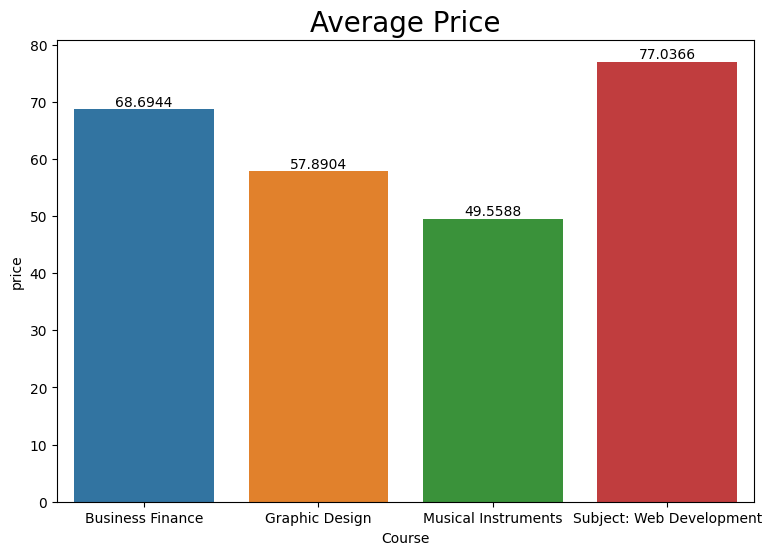

In [423]:
#Average couse price
avg= new_df.groupby('subject')['price'].mean().round()
plt.figure(figsize=(9,6))
plt.title("Average Price",size=20)
chart= sns.barplot(data=new_df,x=df.groupby('subject')['price'].mean().index, y=df.groupby('subject')['price'].mean())

plt.xlabel("Course")
plt.ylabel("price")
for bars in chart.containers:
    chart.bar_label(bars)
plt.show()


Web development had more subscribers..

subject
Business Finance       1569.0
Graphic Design         1766.0
Musical Instruments    1245.0
Web Development        6635.0
Name: num_subscribers, dtype: float64


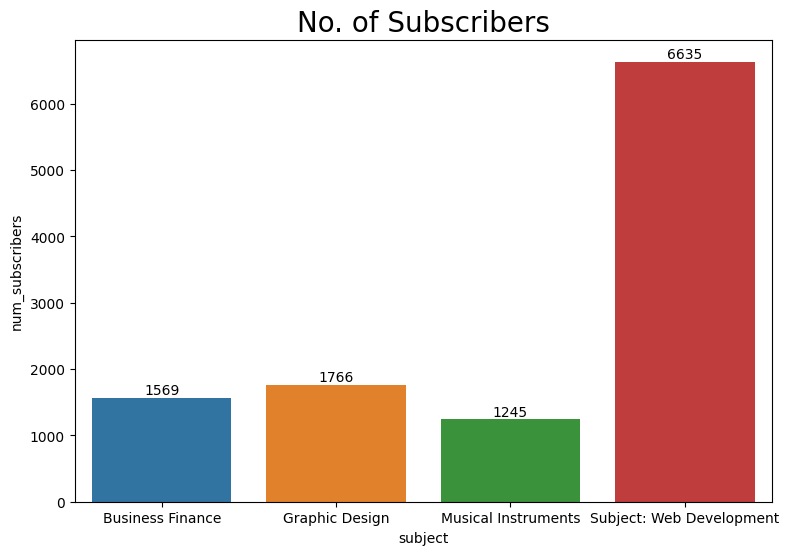

In [424]:
#No. of Subscribers
subs= new_df.groupby('subject')['num_subscribers'].mean().round()
print(subs)
plt.figure(figsize=(9,6))
plt.title("No. of Subscribers",size=20)
chart1= sns.barplot(x=df.groupby('subject')['num_subscribers'].sum().index, y=df.groupby('subject')['num_subscribers'].mean())
for bars in chart1.containers:
    chart1.bar_label(bars,fmt='%d') 
plt.show()

web development course are more published then other.

subject
Business Finance       1191
Graphic Design          602
Musical Instruments     680
Web Development        1203
Name: course_title, dtype: int64


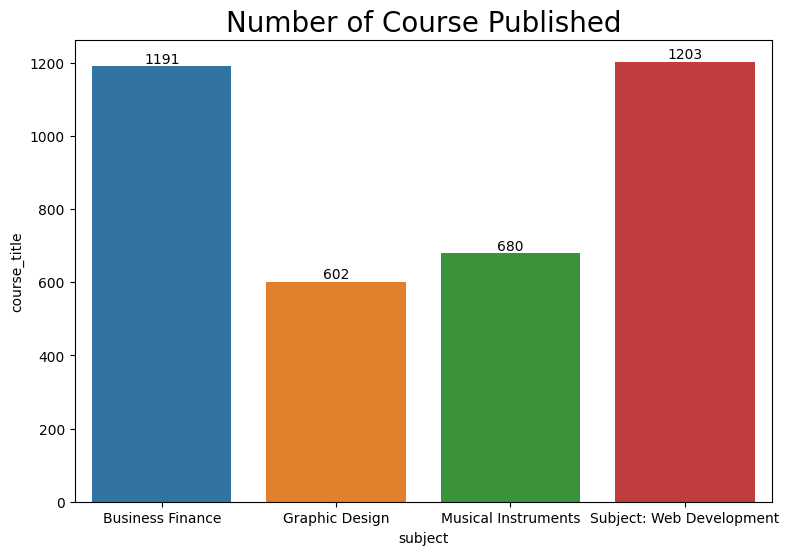

In [425]:
#No. of course published
course_published= new_df.groupby('subject')['course_title'].count()
print(course_published)
plt.figure(figsize=(9,6))
plt.title("Number of Course Published",size=20)
chart2= sns.barplot(x=df.groupby('subject')['course_title'].sum().index, y=df.groupby('subject')['course_title'].count())
for bars in chart2.containers:
    chart2.bar_label(bars,fmt='%d') 
plt.show()

The best rated courses are in Business and Graphics.

subject
Business Finance       0.69
Graphic Design         0.73
Musical Instruments    0.31
Web Development        0.64
Name: Rating, dtype: float64


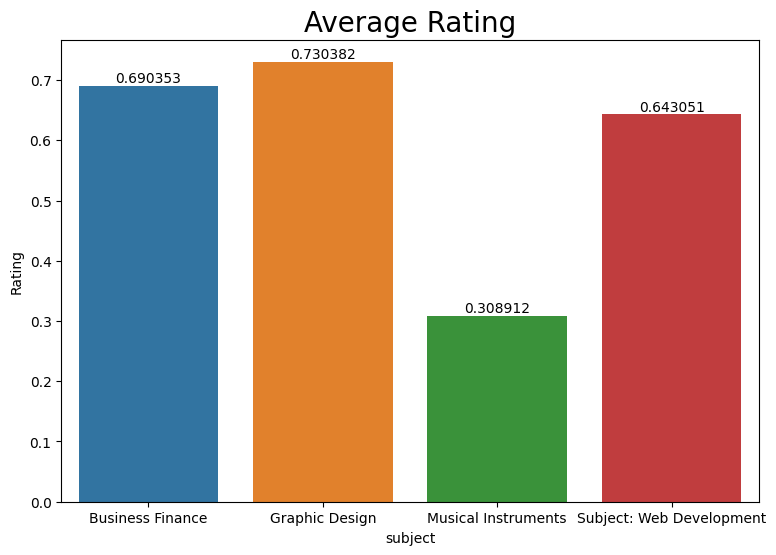

In [426]:
#Average Rating
avg_rating= new_df.groupby('subject')['Rating'].mean().round(2)
print(avg_rating)
plt.figure(figsize=(9,6))
plt.title("Average Rating",size=20)
chart3= sns.barplot(x=df.groupby('subject')['Rating'].mean().index, y=df.groupby('subject')['Rating'].mean())
for bars in chart3.containers:
    chart3.bar_label(bars) 
plt.show()

Mostly users see a web develoipment course in paid version.

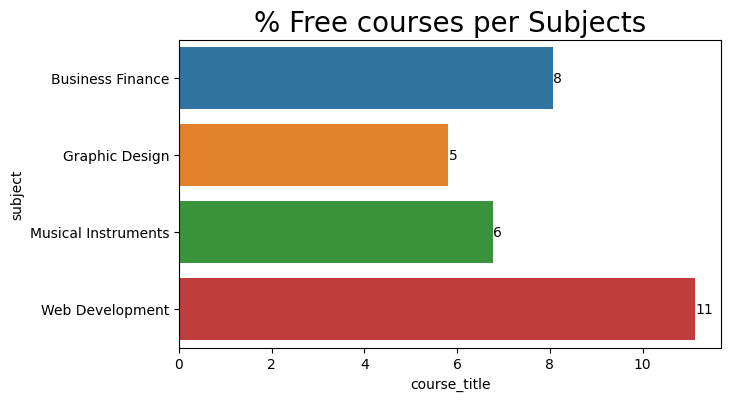

In [427]:
#Revenue generation by subject and course
# freecourse by subject
df_free = new_df.query('price == 0')
plt.figure(figsize=(7,4))
plt.title("% Free courses per Subjects",size=20)
chart4= sns.barplot(y=df_free.groupby('subject')['course_title'].count().index,x=100*df_free.groupby('subject')['course_title'].count()/
          new_df.groupby('subject')['course_title'].count())
for bars in chart4.containers:
    chart4.bar_label(bars ,fmt='%d') 
plt.show()

In paid version Business finance generate more revenue and web development aremuch nearly

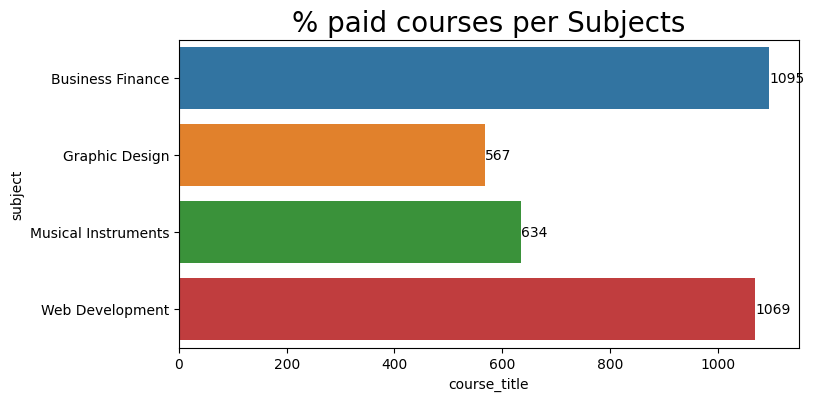

In [428]:
#Revenue generation by subject and course
# paid course by subject
df_free = new_df.query('price != 0')
plt.figure(figsize=(8,4))
plt.title("% paid courses per Subjects",size=20)
chart5= sns.barplot(y=df_free.groupby('subject')['course_title'].count().index,x=df_free.groupby('subject')['course_title'].count())
for bars in chart5.containers:
    chart5.bar_label(bars ,fmt='%d') 
plt.show()

General level of student buy a course.

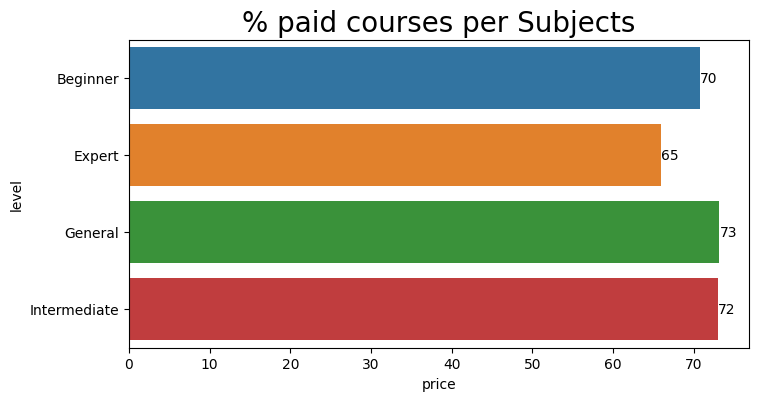

In [429]:
#Revenue generation by subject and course
# average price for different level of learning
plt.figure(figsize=(8,4))
plt.title("% paid courses per Subjects",size=20)
chart6= sns.barplot(y=df_free.groupby('level')['price'].mean().index,x=df_free.groupby('level')['price'].mean())
for bars in chart6.containers:
    chart6.bar_label(bars ,fmt='%d') 
plt.show()

Expert level students buy your course

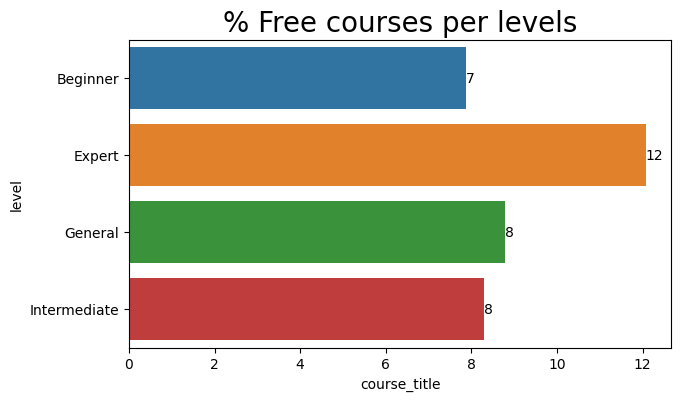

In [430]:
#Revenue generation by subject and course
# % free course all levels
df_free = new_df.query('price == 0')
plt.figure(figsize=(7,4))
plt.title("% Free courses per levels",size=20)
chart7= sns.barplot(y=df_free.groupby('level')['course_title'].count().index,x=100*df_free.groupby('level')['course_title'].count()/
          new_df.groupby('level')['course_title'].count())
for bars in chart7.containers:
    chart7.bar_label(bars ,fmt='%d') 
plt.show()

In [431]:
print(new_df)

                                           course_title  price   
0     bitcoin or how i learned to stop worrying and ...    0.0  \
1            accounting in minutes a brief introduction    0.0   
2                  stock market investing for beginners    0.0   
3                    introduction to financial modeling    0.0   
4                 the complete financial analyst course  195.0   
...                                                 ...    ...   
1200            learning path the road to elasticsearch  200.0   
1201                              angular front to back   40.0   
1202                essentials of spring for developers  125.0   
1203  display and analyze gis data on the web with l...  100.0   
1204  learning path web applications with spring and...  200.0   

      num_subscribers     level  Rating           subject group  Star_rating   
0               65576   General    0.56  Business Finance  free            3  \
1               56659  Beginner    0.95  Busine

students favourite subject is web development

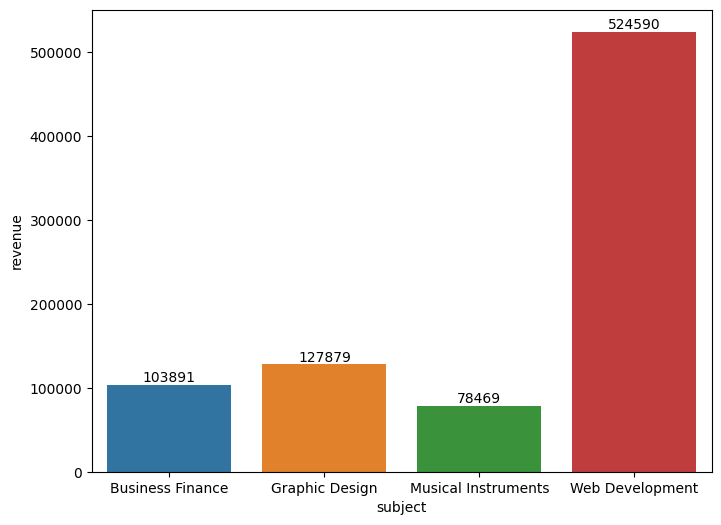

In [432]:
#revenue generation by subject and by course
plt.figure(figsize=(8,6))
chart8= sns.barplot(x=new_df.groupby('subject')['revenue'].sum().index, y=new_df.groupby('subject')['revenue'].mean())
for bars in chart8.containers:
    chart8.bar_label(bars,fmt='%d') 
plt.show()

Web developer bootcamp is generate much revenue as compariosn to other course

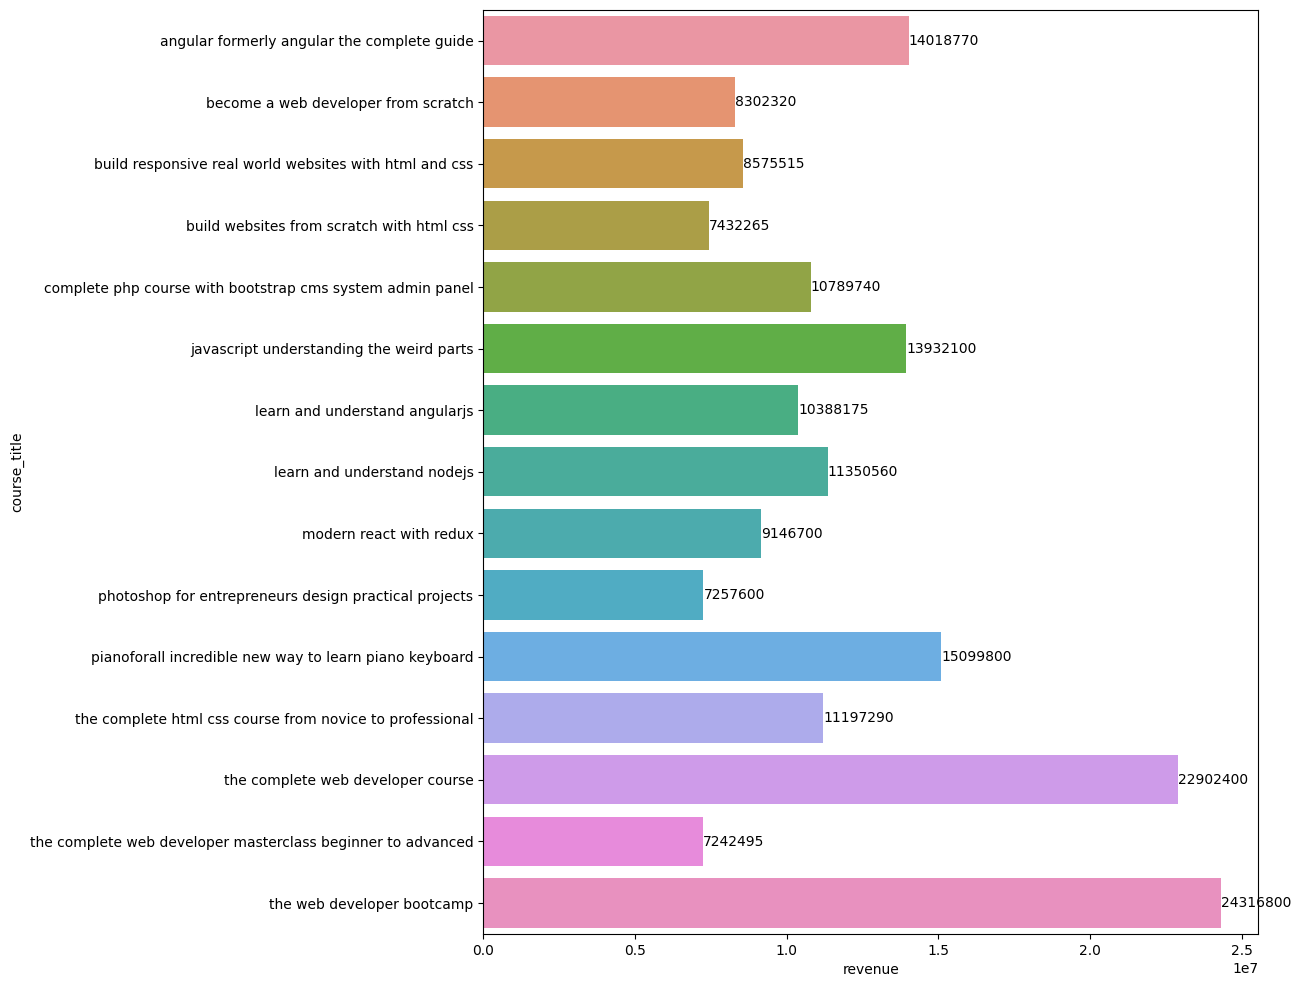

In [433]:
#revenue generation by course
def_rev= new_df [["course_title","revenue"]].sort_values(by = ['revenue'],ascending = False).head(15)
chart9= sns.barplot(y=def_rev.head(15).groupby('course_title')['revenue'].sum().index, x=def_rev.head(15).groupby('course_title')['revenue'].sum())
for bars in chart9.containers:
    chart9.bar_label(bars,fmt='%d') 
plt.show()

learn html programming from scratch has more subscribers

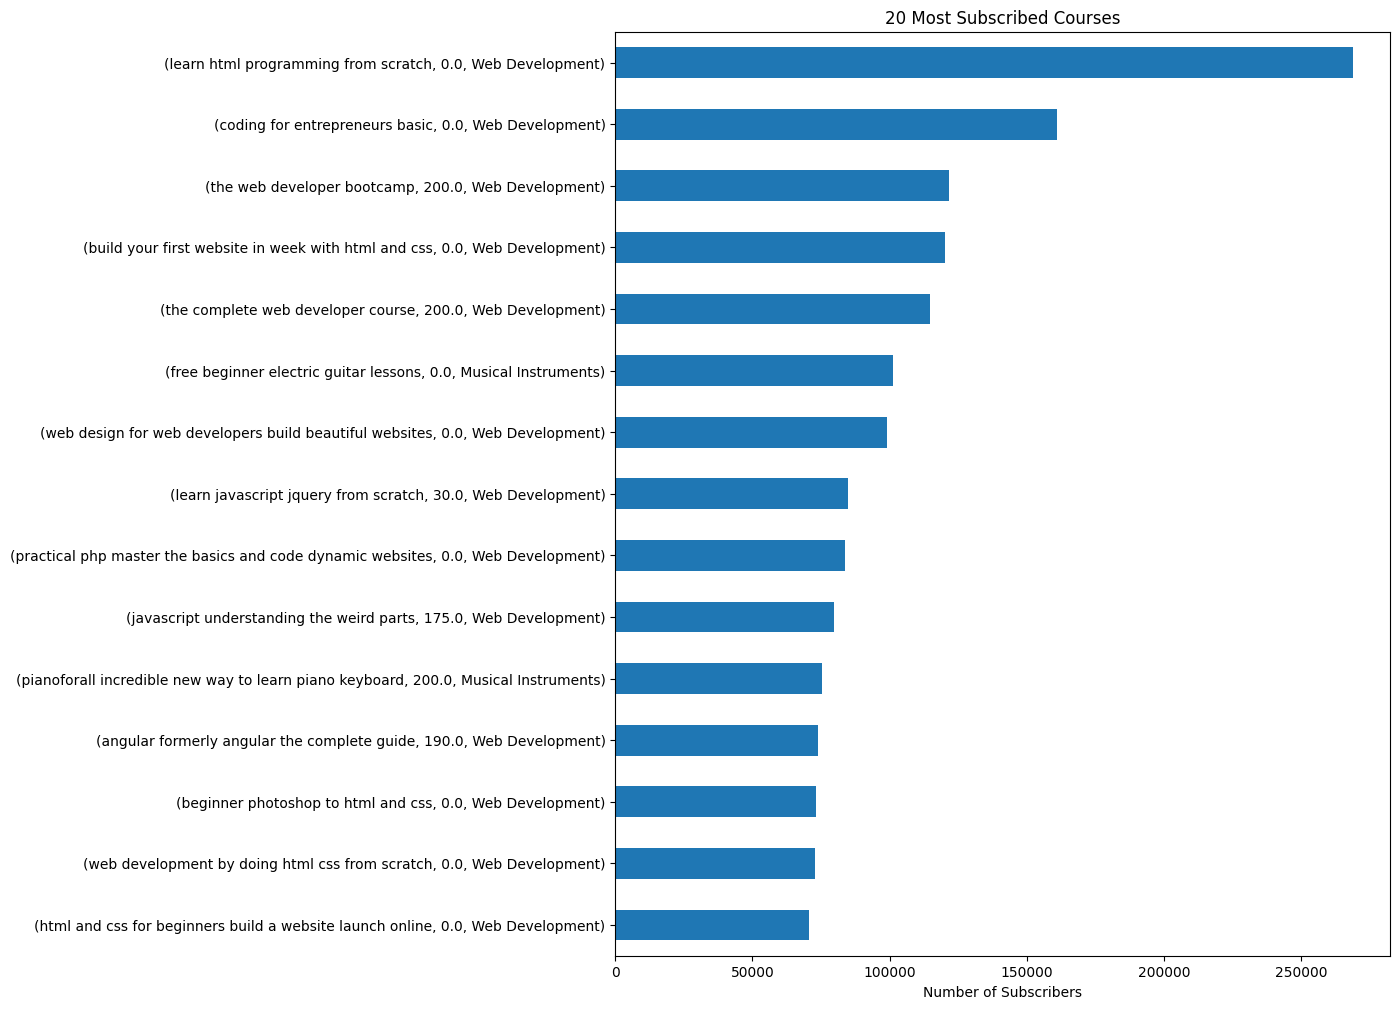

In [434]:
#plot of the courses by number of subscribers
df_sub = new_df.sort_values('num_subscribers', ascending=False).head(15)
df_sub.groupby(['course_title', 'price','subject'])['num_subscribers'].sum().sort_values().plot(kind='barh')
plt.title('20 Most Subscribed Courses')
plt.ylabel('')
plt.xlabel('Number of Subscribers')
plt.rcParams["figure.figsize"] = (10, 12)
plt.show()

C:\Users\zendservices\AppData\Local\Temp\ipykernel_4584\320986583.py:5: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



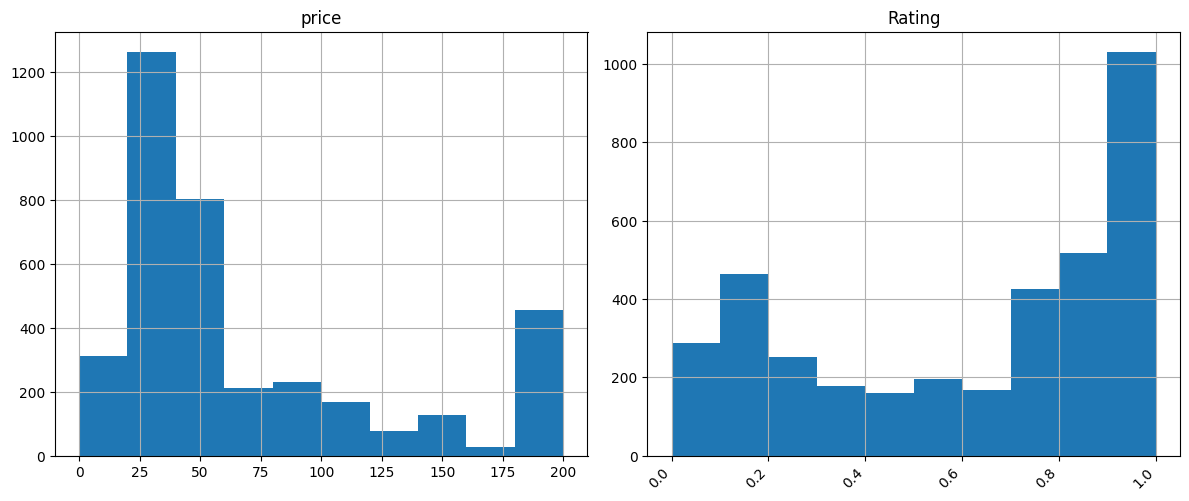

In [435]:
#distribution chart of selected attributes
fig = plt.figure(figsize = (12,5))
ax = fig.gca()

new_df[['price', 'Rating']].hist(ax = ax)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')

plt.show()

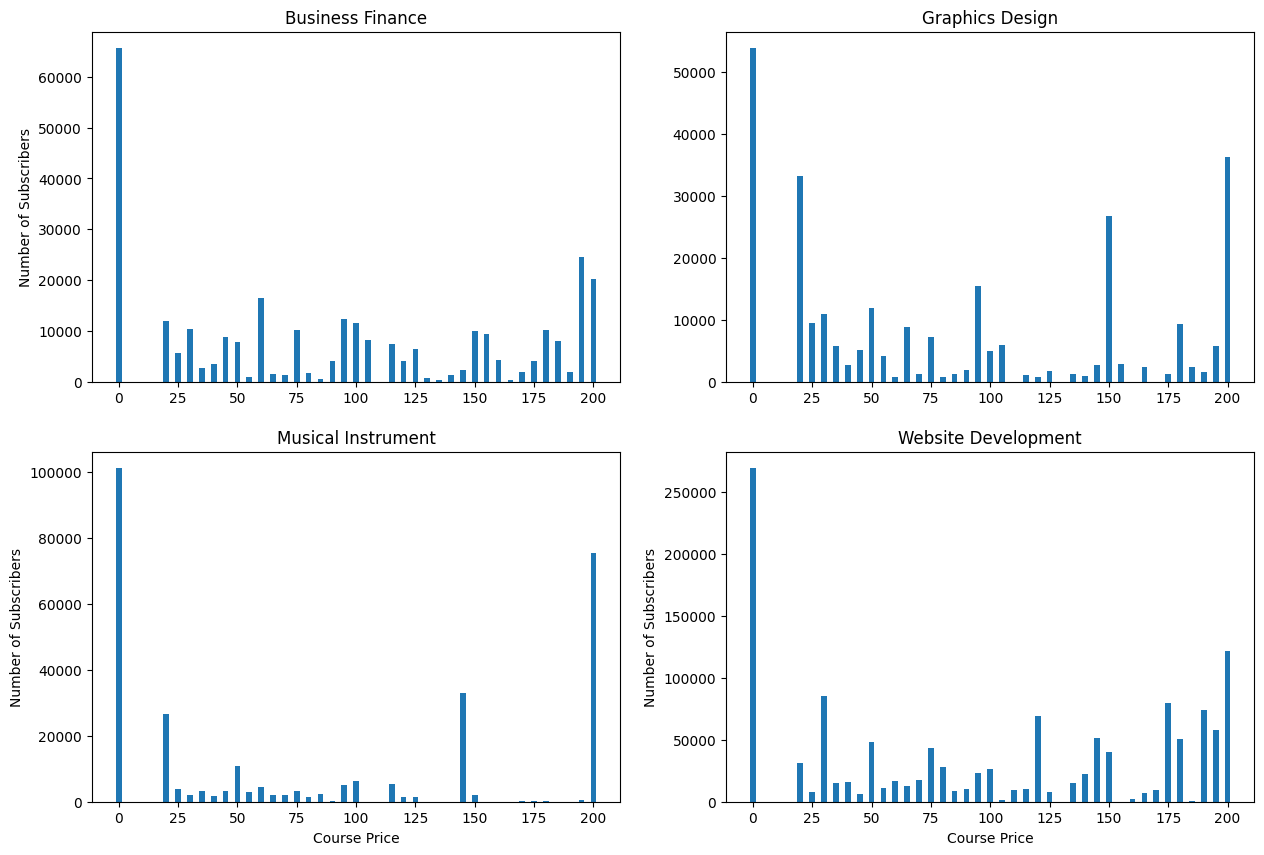

In [452]:
#course price versus number of subscribers
fig, ((ax0, ax1), (ax2, ax3 )) = plt.subplots(2,2 ,figsize=(15,10))

ax0.bar(dif_business.price, dif_business['num_subscribers'], width=2.4)
ax0.set_title('Business Finance')
ax0.set_ylabel('Number of Subscribers')

ax1.bar(dif_design.price, dif_design.num_subscribers, width=2.4)
ax1.set_title('Graphics Design')

ax2.bar(dif_music.price, dif_music.num_subscribers, width=2.4)
ax2.set_title('Musical Instrument')
ax2.set_xlabel('Course Price')
ax2.set_ylabel('Number of Subscribers')

ax3.bar(dif_website.price, dif_website.num_subscribers, width=2.4)
ax3.set_title('Website Development')
ax3.set_xlabel('Course Price')
ax3.set_ylabel('Number of Subscribers')
plt.show()

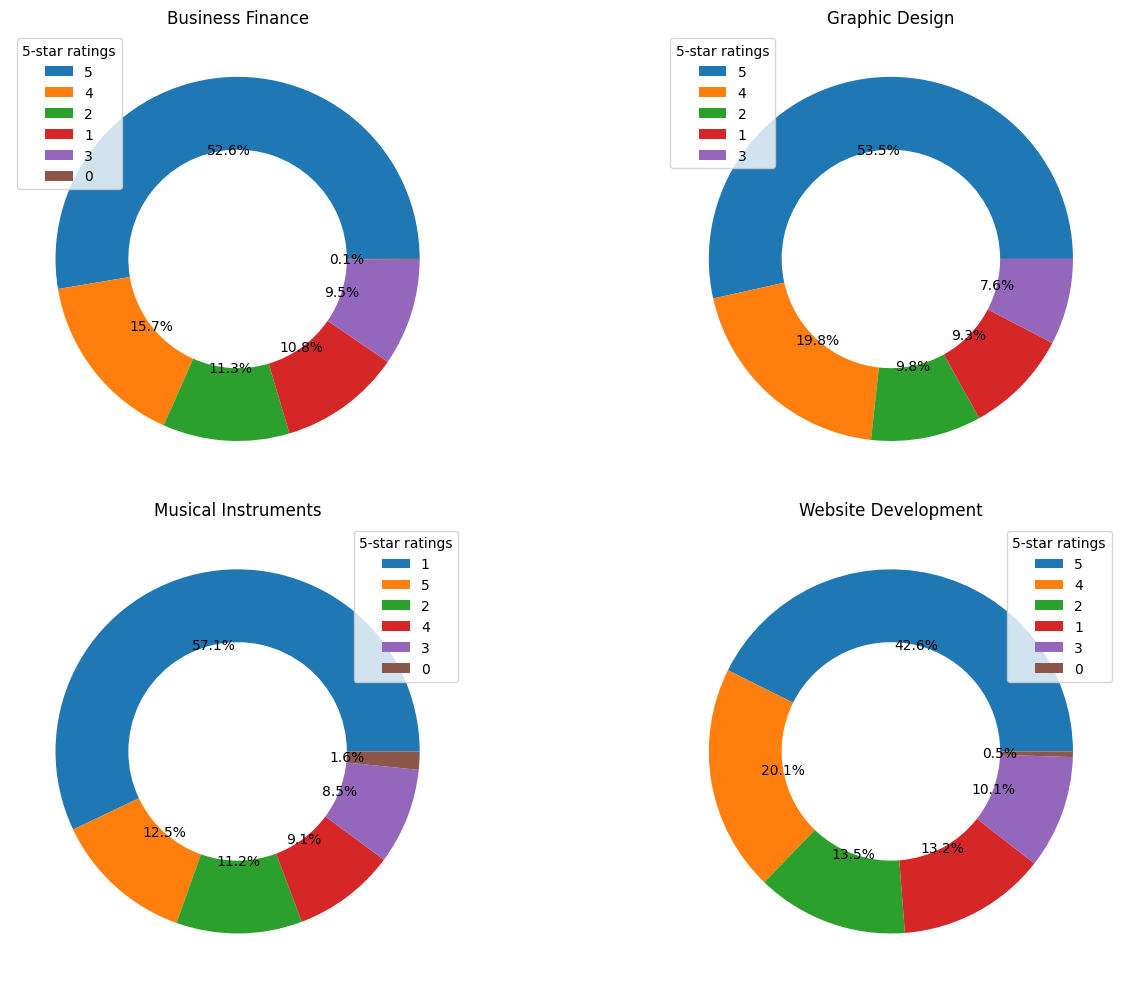

In [451]:
#pieplot for the different courses
# use 5 for number of bins
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2 ,figsize=(15,10))

labels = [0,1,2,3,4,5]

ax0.pie(dif_business['Star_rating'].value_counts(),autopct='%1.1f%%',  wedgeprops=dict(width=.4))
ax0.legend(dif_business['Star_rating'].value_counts().index,title = '5-star ratings')
ax0.set_title('Business Finance')

ax1.pie(dif_design['Star_rating'].value_counts(),autopct='%1.1f%%',  wedgeprops=dict(width=.4))
ax1.legend(dif_business['Star_rating'].value_counts().index,title = '5-star ratings')
ax1.set_title('Graphic Design')

ax2.pie(dif_music['Star_rating'].value_counts(),autopct='%1.1f%%',  wedgeprops=dict(width=.4))
ax2.legend(dif_music['Star_rating'].value_counts().index,title = '5-star ratings')
ax2.set_title('Musical Instruments')

ax3.pie(dif_website['Star_rating'].value_counts(),autopct='%1.1f%%',  wedgeprops=dict(width=.4))
ax3.legend(dif_website['Star_rating'].value_counts().index,title = '5-star ratings')
ax3.set_title('Website Development')

fig.tight_layout()
plt.show()

 Year-on-year revenue generation for the subjects.

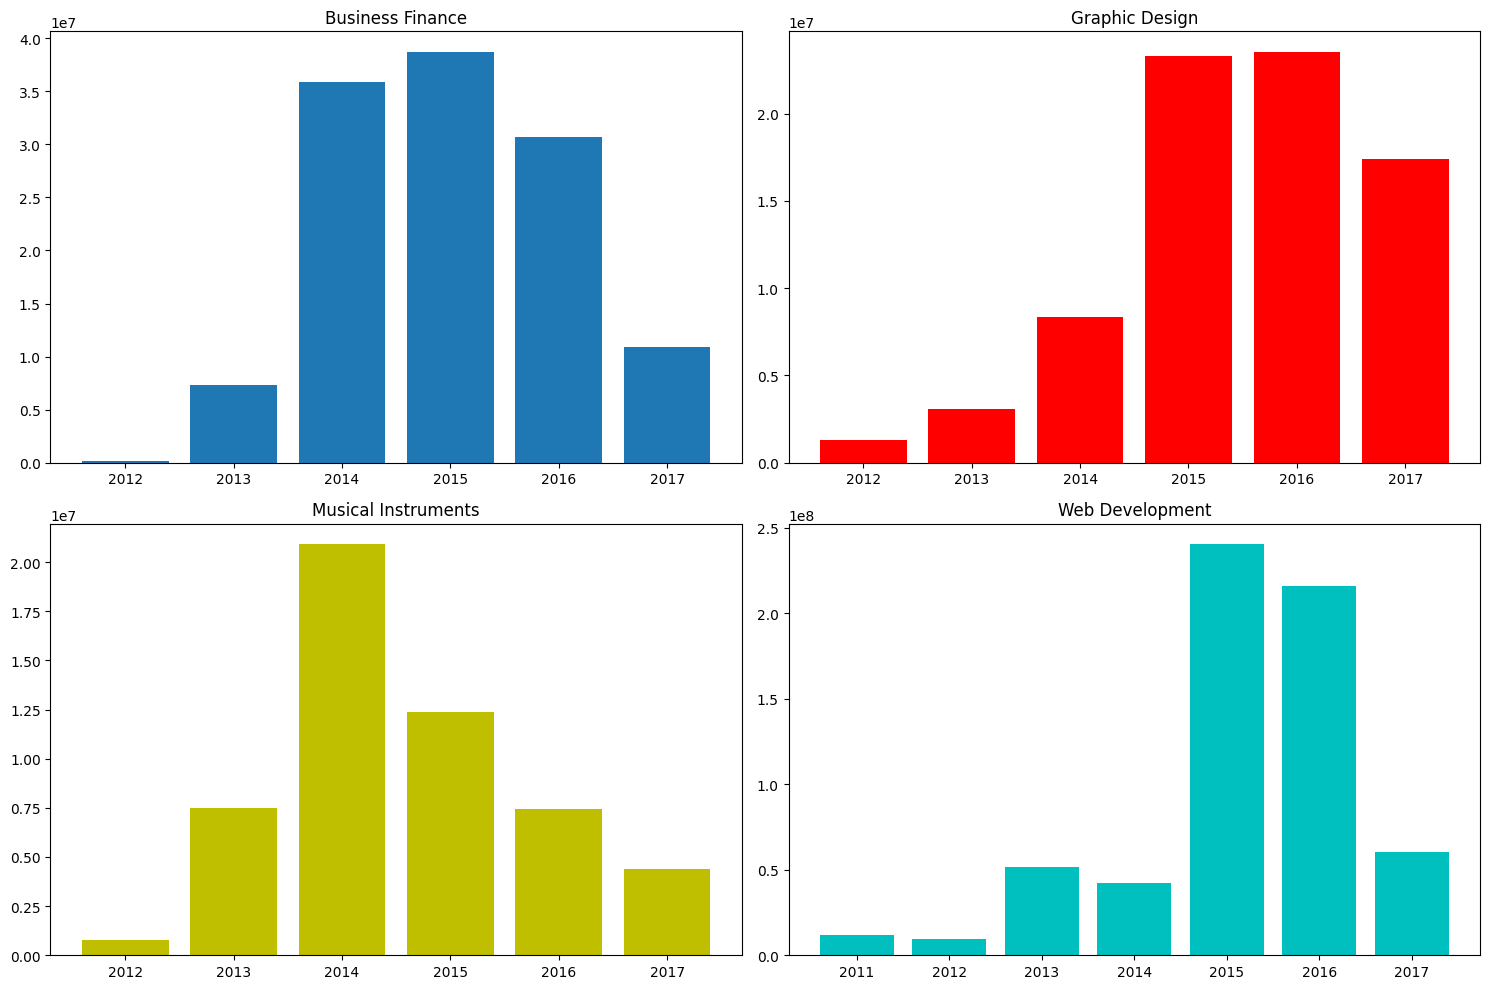

In [450]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2 ,figsize=(15,10))

labels = [0,1,2,3,4,5]

ax0.bar(dif_business.groupby('year')['revenue'].sum().index, dif_business.groupby('year')['revenue'].sum())
ax0.set_title('Business Finance')

ax1.bar(dif_design.groupby('year')['revenue'].sum().index, dif_design.groupby('year')['revenue'].sum(), color='r')
ax1.set_title('Graphic Design')

ax2.bar(dif_music.groupby('year')['revenue'].sum().index, dif_music.groupby('year')['revenue'].sum(),color='y')
ax2.set_title('Musical Instruments')

ax3.bar(dif_website.groupby('year')['revenue'].sum().index, dif_website.groupby('year')['revenue'].sum(), color='c')
ax3.set_title('Web Development')

fig.tight_layout()
plt.show()

Comments:

The dataset is limited to only four subject areas, omitting various interesting areas like Data Science, Cyber Security, Cloud Computing, and Digital Marketing.
The dataset does not reflect updates for the current year, 2022, which could have provided insights into the growth of digital learning during the Covid-19 era.
Demographic data about subscribers and the duration of their learning in the selected subjects are missing.
Course ratings lack detailed comments from subscribers.
The unit of course duration (hours or minutes) is not explicitly stated.
The scale of the rating is not explained, i.e., whether a rating of 0.0 means no rating or the lowest score.
There is no data available on the content creators, which could have revealed the most subscribed and highest-rated
 tutors.
Conclusions:

Web Development has the highest number of published courses, while Graphics Design has the lowest.
Subscribers show more interest in Web Development courses and less interest in Musical Instruments courses.
Graphics Design and Business Finance courses receive the best ratings.
Web Development courses are more expensive, attract more subscribers, and generate the highest revenue.
Expert-level courses have a higher percentage odcross the board.
The year 2016 had the highest number of courses published across different subjects.
Revenue generation peaks in 2014 for Musical Instruments, 2015 for Business Finance and Web Development, and 2016 for Graphics Design.